In [4]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict


with open('F:/jupyter/scipy_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 将包含多个标签的数据条目拆分为多个条目，每个条目只有一个标签
def split_labels(data):
    processed_data = []
    for item in data:
        labels = [label.strip() for label in item['label'].split(',')]
        if len(labels) > 1:
            # 如果有多个标签，则为每个标签创建一个新的条目
            for label in labels:
                new_item = item.copy()
                new_item['label'] = label.strip()  # 确保标签没有多余空格
                processed_data.append(new_item)
        else:
            # 如果只有一个标签，则直接添加原条目，并确保标签没有多余空格
            new_item = item.copy()
            new_item['label'] = labels[0]  # 已经通过 strip() 处理过的标签
            processed_data.append(new_item)
    return processed_data

processed_data = split_labels(data)
processed_data

[{'version': '1.14.1',
  'class': 'issues-closed',
  'label': 'BUG',
  'description': 'doccer: `test_decorator` fails with Python 3.13 due to…'},
 {'version': '1.14.1',
  'class': 'issues-closed',
  'label': 'BUG',
  'description': 'open_memstream unavailable with glibc >= 2.10 + C99'},
 {'version': '1.14.1',
  'class': 'issues-closed',
  'label': 'ENH',
  'description': '3.13 wheels'},
 {'version': '1.14.1',
  'class': 'issues-closed',
  'label': 'BUG',
  'description': 'spsolve prints “dgstrf info” to stdout on singular matrices'},
 {'version': '1.14.1',
  'class': 'issues-closed',
  'label': 'BUG',
  'description': '`special.pro_rad1`: incorrect results'},
 {'version': '1.14.1',
  'class': 'issues-closed',
  'label': 'BUG',
  'description': 'sparse: `hstack/vstack` between a sparse and ndarray breaks…'},
 {'version': '1.14.1',
  'class': 'issues-closed',
  'label': 'MAINT',
  'description': '`cluster`/`stats`: array API test failures in main'},
 {'version': '1.14.1',
  'class': 'iss

C:\Users\dell\AppData\Local\Temp\ipykernel_17472\27645387.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')  # 旋转 x 轴标签以便阅读


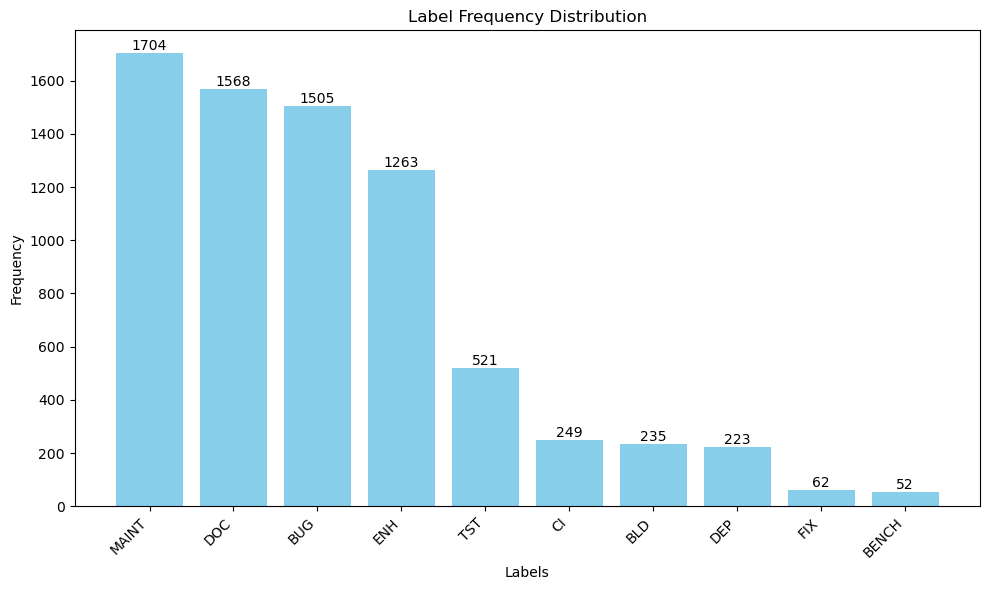

Label="BUG", Count=1505
Label="ENH", Count=1263
Label="MAINT", Count=1704
Label="CI", Count=249
Label="DOC", Count=1568
Label="BLD", Count=235
Label="REL", Count=48
Label="DEP", Count=223
Label="TST", Count=521
Label="FIX", Count=62
Label="STY", Count=14
Label="DEV", Count=35
Label="TYP", Count=2
Label="REV", Count=5
Label="API", Count=15
Label="BENCH", Count=52
Label="MNT", Count=4
Label="DX", Count=1
Label="BUILD", Count=2
Label="DOCS", Count=2
Label="WIP", Count=14
Label="RFC", Count=2
Label="BUGS", Count=2
Label="DEPR", Count=1
Label="PERF", Count=8
Label="EHN", Count=2
Label="LICENSE", Count=1
Label="Q", Count=1
Label="MRG", Count=8
Label="BF", Count=2
Label="GEN", Count=1
Label="COMPAT", Count=1
Label="FAIL", Count=5
Label="ERROR", Count=2
Label="TYPO", Count=1
Label="MEMORY LEAK", Count=1
Label="RF", Count=1
Label="WHT", Count=1


In [5]:
'''总标签数'''
# 统计每种标签的数量
label_counts = Counter(item['label'] for item in processed_data)

# 获取最常见的前10个标签及其数量
top_10_labels = label_counts.most_common(10)

# 提取标签和对应的数量用于绘图
labels, counts = zip(*top_10_labels)

# 创建柱状图
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, counts, color='skyblue')

# 添加标题和标签
ax.set_title('Label Frequency Distribution')
ax.set_xlabel('Labels')
ax.set_ylabel('Frequency')
ax.set_xticklabels(labels, rotation=45, ha='right')  # 旋转 x 轴标签以便阅读

# 在每个柱子上方显示数量
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# 显示图表
plt.tight_layout()
plt.show()

# 打印每个标签的数量
for label, count in label_counts.items():
    print(f'Label="{label}", Count={count}')

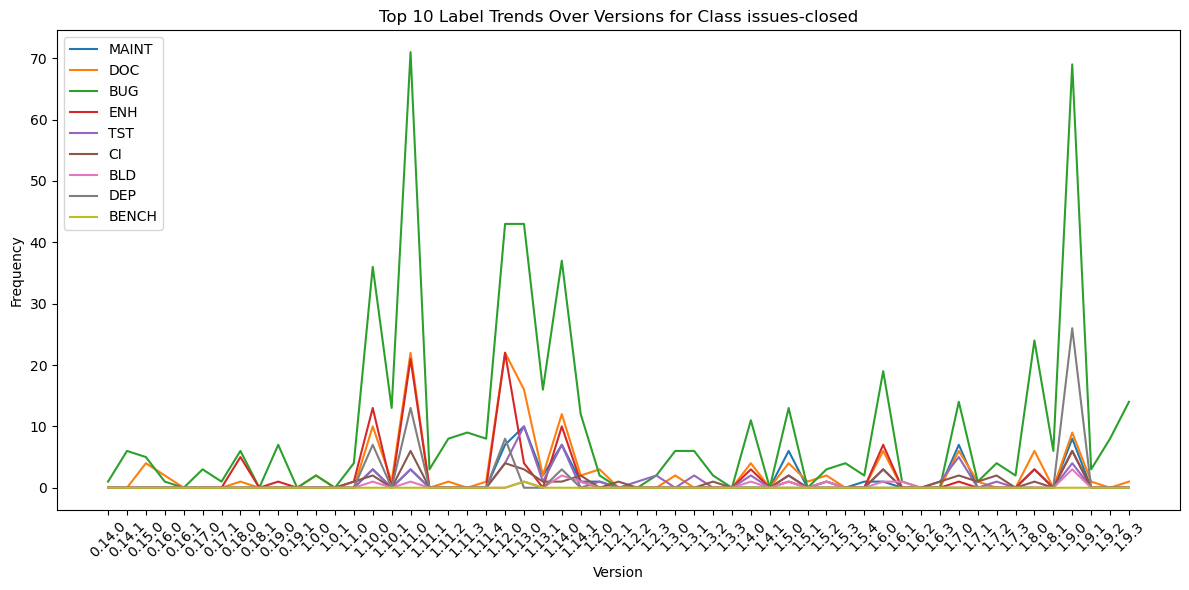

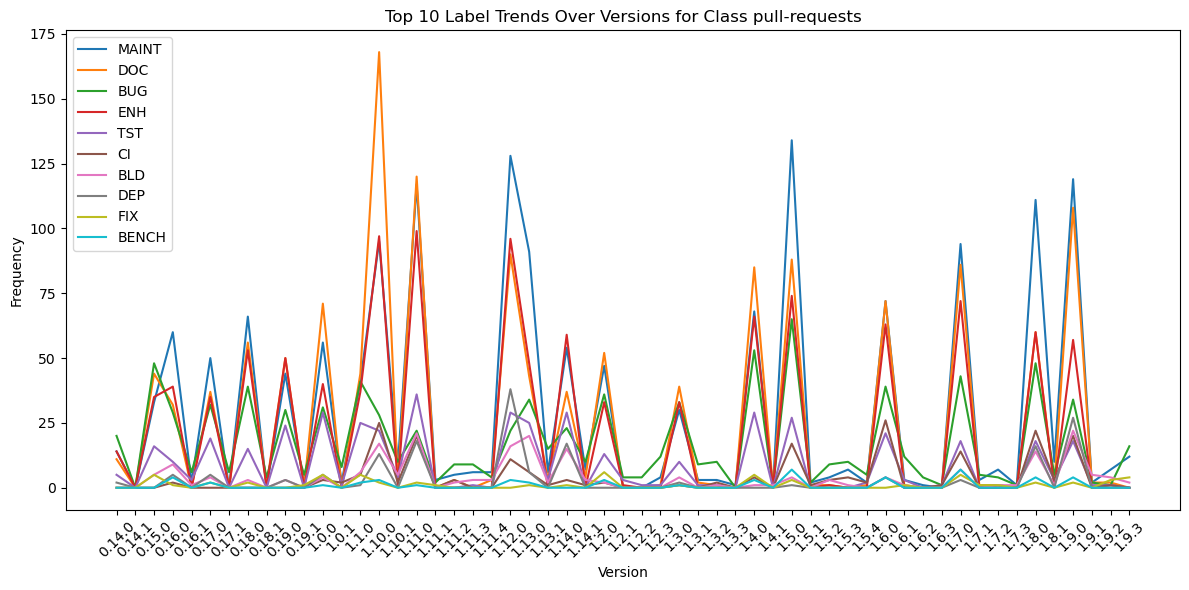

In [8]:
# 统计各版本和类别的标签数量
stats = defaultdict(lambda: defaultdict(Counter))
for item in processed_data:
    version = item['version']
    class_ = item['class']
    label = item['label'].strip()
    stats[version][class_][label] += 1

# 获取所有唯一的版本
all_versions = sorted(set(item['version'] for item in processed_data))
all_labels = sorted(set(item['label'] for item in processed_data))

# 计算所有版本中每个标签的总出现次数
total_label_counts = Counter()
for version, classes in stats.items():
    for class_, labels in classes.items():
        total_label_counts.update(labels)

# 找出出现次数最多的前十个标签
top_labels = [label for label, _ in total_label_counts.most_common(10)]

# 创建一个函数来绘制特定类别的标签趋势折线图
def plot_label_trend(stats, class_to_plot):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 遍历所有标签，创建折线图
    for label in top_labels:
        if label not in all_labels: continue
        
        versions = []
        counts = []
        
        for version in all_versions:
            count = stats[version].get(class_to_plot, Counter()).get(label, 0)
            versions.append(version)
            counts.append(count)
            
        if any(counts):  # 只有当有数据的时候才绘制这条线
            line, = ax.plot(versions, counts, label=label)  # 不加 marker 参数

    # 设置标题、标签和其他图形属性
    ax.set_title(f'Top 10 Label Trends Over Versions for Class {class_to_plot}')
    ax.set_xlabel('Version')
    ax.set_ylabel('Frequency')
    ax.legend()
    plt.xticks(rotation=45)  # 旋转 x 轴标签以便阅读
    plt.tight_layout()  # 确保布局整洁，不会被裁剪
    
    # 显示图表
    plt.show()

# 分别为两个类别调用绘图函数
plot_label_trend(stats, 'issues-closed')
plot_label_trend(stats, 'pull-requests')

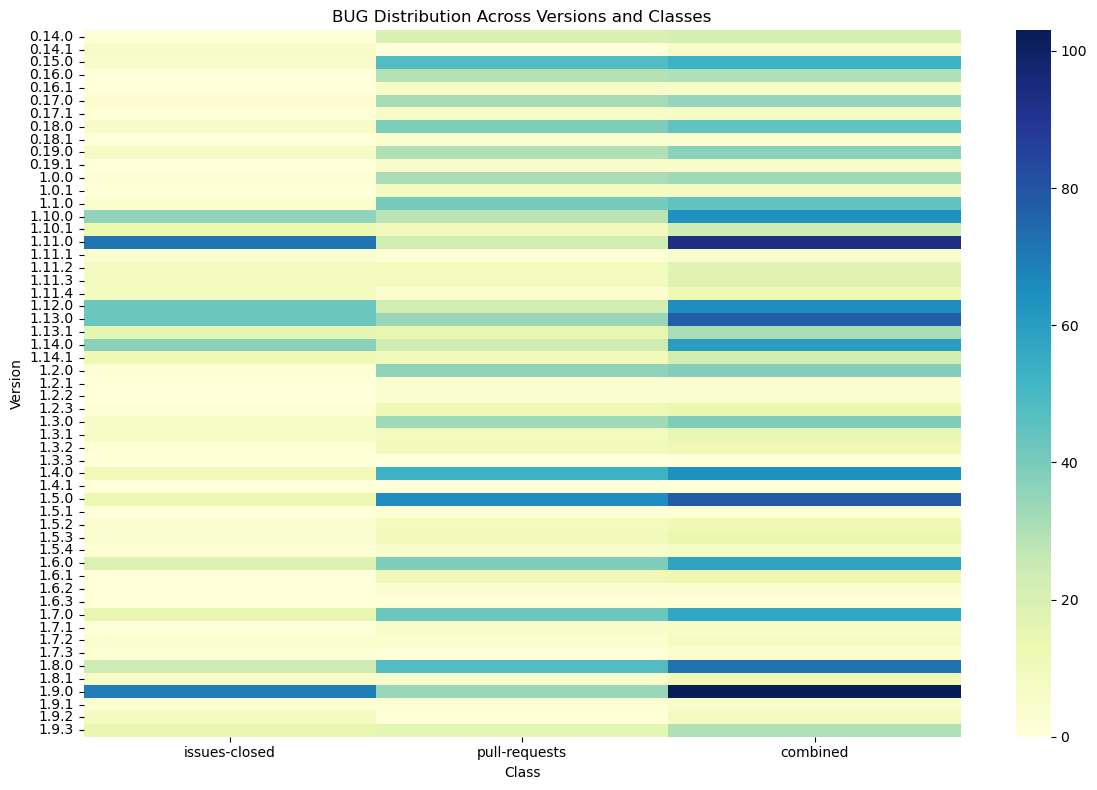

BUG Ratios per Version:
Version 0.14.0: BUG Ratio = 0.0139
Version 0.14.1: BUG Ratio = 1.0000
Version 0.15.0: BUG Ratio = 0.0253
Version 0.16.0: BUG Ratio = 0.0049
Version 0.16.1: BUG Ratio = 0.0000
Version 0.17.0: BUG Ratio = 0.0152
Version 0.17.1: BUG Ratio = 0.1429
Version 0.18.0: BUG Ratio = 0.0236
Version 0.18.1: BUG Ratio = 0.0000
Version 0.19.0: BUG Ratio = 0.0326
Version 0.19.1: BUG Ratio = 0.0000
Version 1.0.0: BUG Ratio = 0.0079
Version 1.0.1: BUG Ratio = 0.0000
Version 1.1.0: BUG Ratio = 0.0183
Version 1.10.0: BUG Ratio = 0.0644
Version 1.10.1: BUG Ratio = 0.2708
Version 1.11.0: BUG Ratio = 0.1170
Version 1.11.1: BUG Ratio = 0.3000
Version 1.11.2: BUG Ratio = 0.2500
Version 1.11.3: BUG Ratio = 0.3103
Version 1.11.4: BUG Ratio = 0.3077
Version 1.12.0: BUG Ratio = 0.0779
Version 1.13.0: BUG Ratio = 0.1162
Version 1.13.1: BUG Ratio = 0.2963
Version 1.14.0: BUG Ratio = 0.1135
Version 1.14.1: BUG Ratio = 0.2667
Version 1.2.0: BUG Ratio = 0.0099
Version 1.2.1: BUG Ratio = 0.0000
V

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

# 统计各版本和类别的标签数量
stats = defaultdict(lambda: defaultdict(Counter))
for item in processed_data:
    version = item['version']
    class_ = item['class']
    label = item['label'].strip()
    stats[version][class_][label] += 1

# 获取所有唯一的版本并排序
all_versions = sorted(set(item['version'] for item in processed_data))

# 初始化一个字典用于存储每个版本的BUG比例
bug_ratios = {}

# 计算每个版本中BUG的数量和总提交数，并计算比例
for version in all_versions:
    total_submissions = sum(sum(labels.values()) for labels in stats[version].values())
    
    # 直接获取BUG数量
    bug_count = stats[version]['issues-closed'].get('BUG', 0) if 'issues-closed' in stats[version] else 0
    
    bug_ratio = bug_count / total_submissions if total_submissions > 0 else 0
    bug_ratios[version] = bug_ratio

# 准备热力图数据：每个版本中不同类别的BUG数量
heatmap_data = {version: {} for version in all_versions}
for version in all_versions:
    for class_ in ['issues-closed', 'pull-requests']:
        if class_ in stats[version]:
            heatmap_data[version][class_] = stats[version][class_].get('BUG', 0)
    
    # 计算两类混合的BUG数量
    combined_bug_count = (heatmap_data[version].get('issues-closed', 0) + 
                          heatmap_data[version].get('pull-requests', 0))
    heatmap_data[version]['combined'] = combined_bug_count

# 将数据转换为适合热力图的格式
versions = list(heatmap_data.keys())
classes = ['issues-closed', 'pull-requests', 'combined']
data_matrix = [[heatmap_data[version].get(cls, 0) for cls in classes] for version in versions]

# 创建热力图
plt.figure(figsize=(12, 8))
sns.heatmap(data_matrix, annot=False, fmt='g', cmap='YlGnBu', xticklabels=classes, yticklabels=versions)
plt.title('BUG Distribution Across Versions and Classes')
plt.xlabel('Class')
plt.ylabel('Version')
plt.tight_layout()
plt.show()

# 打印每个版本的BUG比例
print("BUG Ratios per Version:")
for version, ratio in bug_ratios.items():
    print(f"Version {version}: BUG Ratio = {ratio:.4f}")